### Modeling Cyanobacteria Blooms in Lake Champlain

To do:
- get cleaned up data with:
    - rows with missing cyanobac removed
    - missing values removed
    - month and N:P and target columns added
    - target +1timestep added
- look at histogram/distribution of cyanobac values

Try each of the following:
- linear regression - MC
- logistic regression - TL
- SVM with various kernels -TL
- random forest - MC

Also explore feature importance
- look at the data with PCA?
- use a feature importance function from sci kit learn to look at that...?

In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

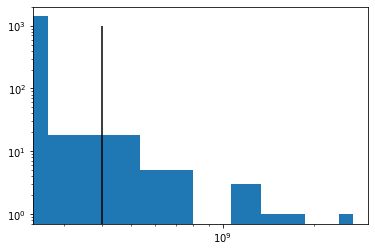

In [75]:
#load data
path = os.getcwd() + '/data/AllSites.csv'

ds1 = pd.read_csv(path)

data['target'] = [1 if x >= 4e8 else 0 for x in data['NP_Cya_bio']]


#print(data[data['target'] == 1])

plt.hist(ds1['NP_Cya_bio'], bins = 10)
plt.xscale('log')
plt.yscale('log')
plt.vlines(4e8, 0, 1e3)

#### Using regex capture groups to clean 'H's and 'J's out of data

In [76]:
print_data = False
show_positive_cases = False
ds2 = ds1.drop(['StationID', 'Station', 'Date', 'Time', 'Stratum', 'Depth'], axis=1)
# ds2
#ds2['Depth'] = ds1['Depth'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Month'] = ds1['Date'].astype(str).str.extract('(\d\d)').astype(int) # This is just the month number
ds2['TP'] = ds1['TP'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['DP'] = ds1['DP'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Cl'] = ds1['Cl'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['TN'] = ds1['TN'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['TempC'] = ds1['TempC'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Chla'] = ds1['Chla'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
#ds2['Chla'] = ds1['Chla'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['Secchi'] = ds1['Secchi'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
ds2['N:P'] = ((ds2['TN']*1e-3)/14.007)/((ds2['TP']*1e-6)/30.974) #for TN in ds2['TN'] for TP in ds2['TP']]
ds2['Target'] = [1 if x >= 4e8 else 0 for x in data['NP_Cya_bio']]

#ds2 = ds2.drop(['NP_Cya_bio'], axis=1)
#y = np.array(ds2['target'])
#X = np.array(ds2.drop(['target'], axis=1))

#if show_positive_cases:
#    ds1.iloc[t]
#if print_data:
#    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#        print(ds2)
#with pd.option_context('display.max_rows', 20, 'display.max_columns', 20): 
#    print(ds2)
print((ds2))

        TP    DP    Cl    TN  TempC   Chla  Secchi   NP_Cya_bio  Month  \
0     39.2  16.2  13.0  0.61    NaN   1.41     0.5          0.0      4   
1     36.8  14.8  17.5  0.45   13.7   9.67     1.1          0.0      5   
2     50.1  27.4  12.1  0.55   14.5   2.04     0.7          0.0      5   
3     62.6  33.6  11.9  0.60    NaN   2.54     0.8          NaN      6   
4     59.6  32.6  12.0  0.65   17.7   4.13     0.6          0.0      6   
...    ...   ...   ...   ...    ...    ...     ...          ...    ...   
3632  94.2  40.7   8.7  0.90   22.3  50.16     1.0  443000000.0      9   
3633  90.8  33.8   8.7  0.72   22.2  29.84     1.0          NaN      9   
3634  68.8  42.6   9.6  0.74   13.4  10.22     1.4    9460000.0     10   
3635  70.7  44.0   9.7  0.72   13.2   7.12     1.6          NaN     10   
3636  79.4  49.7   9.2  0.76    9.2  11.81     1.3    6510000.0     10   

            N:P  Target  
0     34.410892       0  
1     27.040633       0  
2     24.276000       0  
3     2

In [ ]:
data['Month'] = [int(x[0:2]) for x in data['Date']]
#data['moles N'] = [(TN*0.001)/14.007 for TN in data['TN']]
#data['N:P'] = [((TN*1e-3)/14.007)/((TP*1e-6)/30.974) for TN in data['TN'] for TP in data['TP']]

data['Label'] = ['Bloom' if x >= 4e8 else 'noBloom' for x in data['NP_Cya_bio']]


print(data[data['Label'] == 'Bloom'])